<a href="https://colab.research.google.com/github/kameda-yoshinari/DataAlgo-T/blob/master/DataAlgo_T(009)_ShortestNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3. N-N Shortest Path Problem

Learn the algorithm to find the shortest path among any pair in a given graph. It is called N to N shortest path problem.

**Reminder**  
On github, rendering might not be in good shape.  
To see the expected layout, open this page in Google Colaboratory.
To run one specific code cell in colab, click the icon on the left part or just type Ctrl + Enter.  


# Preparation

Connect the Jupyter environment and invoke a runtime. 
Mount your Google Drive by the procedure below.  
Change directory to the mounted point and make it as the working folder.  
By then, files are preserved even after you terminate the runtime environment.

In [ ]:
!echo "Mounting your Google Drive"
from google.colab import drive 
drive.mount('/content/drive')

In [ ]:
!echo "Make a working folder and chnage directory to it"
%cd /content/drive/My\ Drive
%mkdir -p DataAlgo-T/009
%cd       DataAlgo-T/009
!ls

Requirements to the graphs are same as Section 4.1. (Dijkstra).
We use Graph G6, G7, and G8.


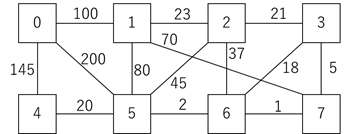

In [ ]:
%%writefile graph6.h
// 8 nodes, undirected, no loop, positive weight.
// NC means no edges.
// NC will be treated as "inifinity" on searching the shortest path. 
#define N 8
#define NC 9999 // this big value means both no path and infinity 
int edge[N][N] = {
//     0   1   2   3   4   5   6   7
	{  0,100, NC, NC,145,200, NC, NC}, // 0
	{100,  0, 23, NC, NC, 80, NC, 70}, // 1
	{ NC, 23,  0, 21, NC, 45, 37, NC}, // 2
	{ NC, NC, 21,  0, NC, NC, 18,  5}, // 3
	{145, NC, NC, NC,  0, 20, NC, NC}, // 4
	{200, 80, 45, NC, 20,  0,  2, NC}, // 5
	{ NC, NC, 37, 18, NC,  2,  0,  1}, // 6
	{ NC, 70, NC,  5, NC, NC,  1,  0}  // 7
};

In [ ]:
%%writefile graph7.h
// 4 nodes, directed, positive weight.
// NC means no edges.
// NC will be treated as "inifinity" on searching the shortest path. 
#define N 4
#define NC 9999 // this big value means no path
int edge[N][N] = {
//     0   1   2   3
	{  0, 10, NC, 40}, // 0
	{ NC,  0, NC, 20}, // 1
	{ NC, NC,  0, NC}, // 2
	{ NC, NC, NC,  0}, // 3
};

In [ ]:
%%writefile graph8.h
// 12 nodes, directed, positive weight.
// NC means no edges.
// NC will be treated as "inifinity" on searching the shortest path. 
#define N 12
#define NC 9999 // this big value means no path
int edge[N][N] = {
    { 0, 4,NC,NC, 3,NC,NC,NC,NC,NC,NC,NC},
    { 4, 0, 1,NC,NC,NC, 2,NC,NC,NC,NC,NC},
    {NC, 1, 0, 1,NC,NC,NC, 2,NC,NC,NC,NC},
    {NC,NC, 1, 0,NC,NC,NC,NC,NC,NC,NC,NC},
    { 3,NC,NC,NC, 0, 1,NC,NC, 1,NC,NC,NC},
    {NC,NC,NC,NC, 1, 0, 2,NC,NC, 2, 3,NC},
    {NC, 2,NC,NC,NC, 2, 0,NC,NC,NC, 3,NC},
    {NC,NC, 2,NC,NC,NC,NC, 0,NC,NC,NC,NC},
    {NC,NC,NC,NC, 1,NC,NC,NC, 0,NC,NC,NC},
    {NC,NC,NC,NC,NC, 2,NC,NC,NC, 0,NC,NC},
    {NC,NC,NC,NC,NC, 3, 3,NC,NC,NC, 0, 1},
    {NC,NC,NC,NC,NC,NC,NC,NC,NC,NC, 1, 0}
};

# Floyd's Algorithm

**Explanation**

For the basic assumptions of the shortest path problem, see the section 4.2.


**Alternative plan: use of Dijkstra for N times**

Before introducing the new algorithm proposed by Floyd, let's think alternative way of finding the N-N problem.
The simplest method is to run the Dijkstra (shortest-dijkstra_E.c) program for N times by changing the starting vertex from 0 to N-1.
Actually, on the big-O notation discussion, the computation amount is same sa the floyd algorithm (it appears later).

However, you are encouraged to learn the floyd algorithm because this is one of the most sophisticated algorithm that fits computers. (This measn sometimes it is not easy for human beings to invent this kind of program by nature.)

**Floyd's Algorithm**

The core part of the Floyd's algorithm is rather simple.
Suppose we are in the middle of the process. At this moment, we obtain tentative minimum weight of the path from Vetex A to Vertex B, and it is denoted as W(A,B).

Let's consider the path from Vertex A to Vertex B now. If we find the intermediate vertex C where
> W(A,C) + W(C,B) < W(A,B)

is satified, the value of W(A,B) should be replced by W(A,C) + W(C,B).  
Repeat this process until all the W(X,Y) are settled.

The last (yet hard) problem is how to pick up pairs and the intermediate vertex among the edges and vertices in the graph.

In the Floyd's algorithm, this is solved by permitting the intermediate vertices step by step. On enlarging the set of intermediate vertices, update the tentative minimum values of any pairs by refering the results of one step before.

1. For all the edge pairs A and B, W(A,B) is set to infinite.
2. W(A,B) set to the edge(A,B) only when edge(A,B) is not infinite. This corresponds to the situation where we are allowed to move when there is a direct edge from A to B. (equivalent to direct flight for air travel).
3. Pick up one vertex C. (This is like adding a new transfer airport which could be used for transfer in air travel.)
4. for any vertex pair A and B, update W(A,B) only when W(A,C) + W(C,B) is smaller than W(A,B). 
5. Repeat Step 3 and 4 until all the vertices are allowed to use as trasnfer. 

An execution example on Graph G6 is shown in the diagram below.   
The intermediate vertices are chosen from Vertex 0, then 1, 2, ... and 7 at step 3.  

Note that "Direct only" in the diagram means the end of the step 2.
Then as for the first visit of Step 3, Vertex 0 is chosen to be allowed to use as "transfer" vertex.  
Note that on first visit of Step 4, we comppare these two for any Src/Dst vertex pair. (Trs is Vertex 0 here)
* W(Src,Dst)
* W(Src,Trs) + W(Trs, Dst)
Updated paths are in red color (remember NC is infinite, so any finite value could replace it).  
You have to recognize that W(Src,Trs) and W(Trs, Dst) never changes during the step 4 (for example, W(Src,Trs) could be updated only when W(Src,Trs)+W(Trs,Trs) is smaller ... obvisouly it is stupid). In the diagram, green cells coressponds to the W(Src,Trs) and W(Trs,Dst).  
On the second visit of step 4, you have to remind that W(Src,1) and W(1,Dst) are the result of counting the Vertex 0 as for transfer. We only have to think where to insert the transfer airport 1 on the path. This last part is probably the most difficult to understand, so make sure you surely understand the procedure.


**Implementation**

Implementation should be very simple. See the program part below.

**Remarks**

FYI, Floyd's algorithm is classified as dynamic programming.




![floyd](https://user-images.githubusercontent.com/45651568/90324349-98d7ca00-dfa8-11ea-929a-12de47d3da75.png)


# C program of Flyod's algorithm

**Purpose**

Develop the C program to find minimum weight paths to all the vertice pairs in the given graph. 

**Explanation**

main process is in find_shortest_floyd() function.

**Program**

If you pass something as command line option, the output is changed to simpler version.
To see what happens, read carefully the program by checking the simpledisplay variable.

**Remarks**

The find_shortest_floyd() seems to be very simple.
As for the main part of step 3-5, there is only tri-nested for loop in which only on if() statement.
Yet it does much more than Dijkstra's program.  
This means the floyd algorithm is really fit to computer architecture and C language.


In [ ]:
%%writefile shortest-floyd_E.c
// Shortest path by Floyd
// kameda[at]ccs.tsukuba.ac.jp, 2020.
#include <stdio.h> // printf()
#include <stdlib.h> // atoi()
#include "graph6.h" // edge[][], N, NC

int simpledisplay = 0; // 0:normal, 1:simpler

// Structured variable for vertex 
typedef struct {
    int cost; // tentative distance.
    int trans; // the vertex you have to visit (trasnfer) on realizing the minimum cost.
} CostTrans;

CostTrans pathinfo[N][N]; //  [a][b] source vertex a and destination veretex b

// Display all the shortest paths by recursive call
// Note that the last destination vertex won't be shown by this function.
void outputpath(int SrcVertex, int DstVertex){
    // Termination condition of recursive all is to find the direct edge  (pathinfo[s][d].trans==s).
    // Only the source vertex is shown.
    if (pathinfo[SrcVertex][DstVertex].trans == SrcVertex) {
        printf("%2d ", SrcVertex);
    } else {
        // path before the transfer and the path after the transfer
        outputpath(SrcVertex, pathinfo[SrcVertex][DstVertex].trans);
        outputpath(pathinfo[SrcVertex][DstVertex].trans, DstVertex);
    }
}

// Show the "transfer" matrix
void print_path_status(void){
    int SrcVertex, DstVertex;

    if (simpledisplay == 0) {
        for (SrcVertex = 0; SrcVertex < N; SrcVertex++) {
            for (DstVertex = 0; DstVertex < N; DstVertex++) {
                if (pathinfo[SrcVertex][DstVertex].cost >= NC) 
                    printf("---(--) ");
                else
                    printf("%3d(%2d) ", pathinfo[SrcVertex][DstVertex].cost, pathinfo[SrcVertex][DstVertex].trans);
            }
            printf("\n");
        }
    } else {
        for (SrcVertex = 0; SrcVertex < N; SrcVertex++) {
            for (DstVertex = 0; DstVertex < N; DstVertex++) {
                if (pathinfo[SrcVertex][DstVertex].cost >= NC) 
                    printf("NC\t");
                else
                    printf("%d\t", pathinfo[SrcVertex][DstVertex].cost);
                }
            printf("\n");
        }
    }

    return ;
}

// Mainbody of Floyd's algorithm 
void find_shortest_floyd(void){
    int SrcVertex, DstVertex;
    int MidVertex; // a.k.a. "transfer vertex"
    int NewCost;
    
    // Initialize tentative distance by weight of direct edges
	// Note that no edge is expressed by NC, so just copy all the adjacent matrix elements
    for (SrcVertex = 0; SrcVertex < N; SrcVertex++) {
        for (DstVertex = 0; DstVertex < N; DstVertex++) {
            pathinfo[SrcVertex][DstVertex].cost = edge[SrcVertex][DstVertex];
            pathinfo[SrcVertex][DstVertex].trans  = SrcVertex; // 直行が解の時は trans == SrcVertex
        }
    }
    printf("After step 2: direct edges only ===\n");
    print_path_status();

	// The outmost loop corresponds to step 3 and 5
	// The second and third loops correspond to step 4
    for (MidVertex = 0; MidVertex < N; MidVertex++) {
        for (SrcVertex = 0; SrcVertex < N; SrcVertex++) {
            for (DstVertex = 0; DstVertex < N; DstVertex++) {
                NewCost = pathinfo[SrcVertex][MidVertex].cost + pathinfo[MidVertex][DstVertex].cost;
                if (NewCost < pathinfo[SrcVertex][DstVertex].cost) {
                    pathinfo[SrcVertex][DstVertex].cost = NewCost;
                    pathinfo[SrcVertex][DstVertex].trans  = MidVertex;
                }
            }
        }
        printf("After step 4 (Vertex %2d as new tranfer vertex) ===\n", MidVertex);
        print_path_status();
    }

    // Final result
    if (simpledisplay == 0) {
        printf("Answers of the shortest paths\n");
        for (SrcVertex = 0; SrcVertex < N; SrcVertex++) {
            for (DstVertex = 0; DstVertex < N; DstVertex++) {
                printf("%2d => %2d: ",SrcVertex, DstVertex);
                if (pathinfo[SrcVertex][DstVertex].cost == NC) {
                    printf("  - : (No path)");
                } else {
                    printf("%3d :", pathinfo[SrcVertex][DstVertex].cost);
                    outputpath(SrcVertex, DstVertex);
                    printf("%2d", DstVertex);
                }
                printf("\n");
            }

            printf("\n");
        }
    }

    return ;
}

// Main function
int main(int argc, char *argv[]){
      
    if (argc >= 2) {
        simpledisplay = 1;
        printf("Output in simpler mode.\n");
    }

    find_shortest_floyd();

    return 0;
}




Compile it and check no errors.

In [ ]:
!gcc -Wall -o shortest-floyd_E shortest-floyd_E.c

Run it.

In [ ]:
!./shortest-floyd_E 

If you run it with options, output becomes simple.

In [ ]:
!./shortest-floyd_E simple

# Problems

1. Vertex list of the shortest path  
shortest-floyd_E.c program includes a trick to show the shortest paths. Point out the corresponding part of the trick and explain why it can show the vertex list.

2. Computation amount  
Discuss the computation amount of time and space of shortest-floyd_E.c program.

3. Develop the program based on shortest-dijkstra_E.c program  
Implement the alternative plan: use of Dijkstra for N times by your hand. And compare its computation amount of time and space with shortest-floyd_E.c program.


#**Course Info**

https://github.com/kameda-yoshinari/DataAlgo-T  
Course: Data structure and algorithm  
Department of Engineering Systems, University of Tsukuba,Japan.  
Author: KAMEDA, Yoshinari  
2020.05.19. -  